In [1]:
import evolvepy as ep
import numpy as np
import matplotlib.pyplot as plt

## Definindo a função a ser avaliada

In [2]:
# digite a sua expressão lógica usando + como AND, * como OR e ! como NOT
expression = "("
# digite o número de variáveis (não repetidas) que você usou na expressão
n_variables = 3

In [3]:
def fitness_function(individuals):
	individual = individuals[0]["chr0"] 
	score = 0
	if individual[0]:
		score+=1
	if not individual[1]:
		score+=1
	if not individual[2]:
		score += 1

	return score

In [4]:
from evolvepy.evaluator import FunctionEvaluator

evaluator = FunctionEvaluator(fitness_function, mode=FunctionEvaluator.PYTHON)

# Generator

Here we will define the generator for the problem

first, we need to define a descriptor with a boolean (true/false) chromossome

In [5]:
# here we have individual with 1 chromossome with type boolean. There is no need t define the chromossome varition range
descriptor = ep.generator.Descriptor(n_variables, types=[bool])

In [6]:
print(descriptor.dtype)

[('chr0', '?', (3,))]


In [7]:
from evolvepy.generator import CombineLayer, Generator, FirstGenLayer
from evolvepy.generator.mutation import BinaryMutationLayer, bit_mutation
from evolvepy.generator.crossover import one_point
from evolvepy.generator.selection import tournament

combine = CombineLayer(tournament, one_point)
mutation = BinaryMutationLayer(bit_mutation, 0.8, 0.4)

combine.next = mutation

gen = Generator(descriptor=descriptor, first_layer=combine, last_layer=mutation)

In [8]:
gen._layers

# Run and Results

Let's evolve our population and see the results

In [9]:
n_generations = 50
n_individual = 10
evolver = ep.Evolver(gen, evaluator, n_individual)
hist, last_population = evolver.evolve(n_generations)

In [10]:
last_population[np.argmax(hist[-1])]

([ True, False, False],)

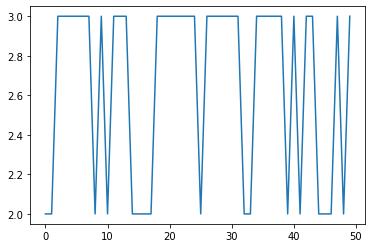

In [11]:
import matplotlib.pyplot as plt

plt.plot(hist.max(axis=1))
plt.show()